### **Ad Hoc Analysis**
Analysing the loyalty program of Lola Tamis. 

In [17]:
import pandas as pd

df = pd.read_json('transaction-data-adhoc-analysis.json')
df

,address,birthdate,mail,name,sex,username,transaction_items,transaction_value,transaction_date
0,USNS Wagner\nFPO AE 00917,1926/03/11,watsonbrenda@gmail.com,Jennifer Campbell,F,veronicawells,"Exotic Extras,Beef Chicharon,(x4)",5196,2022/01/12
1,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Exotic Extras,Beef Chicharon,(x3);HealthyKid 3...",12056,2022/01/12
2,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Gummy Vitamins,(x3);HealthyKid 3...",5500,2022/01/08
3,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Yummy Vegetables,(x1)",500,2022/01/10
4,"33911 Hansen Loaf\nWest Sandra, ND 54188",1949/09/27,michael78@yahoo.com,Kristen Cooper,F,qhernandez,"Candy City,Orange Beans,(x3);Candy City,Gummy ...",2697,2022/01/24
...,...,...,...,...,...,...,...,...,...
83031,"96081 Harrison Brooks\nJenniferbury, MA 02124",2019/10/26,christina55@hotmail.com,Tammy Byrd,F,kmcconnell,"Exotic Extras,Kimchi and Seaweed,(x2);HealthyK...",3588,2022/06/05
83032,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"HealthyKid 3+,Yummy Vegetables,(x1);Exotic Ext...",2095,2022/06/12
83033,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"Candy City,Orange Beans,(x4);Candy City,Gummy ...",3396,2022/06/15
83034,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"HealthyKid 3+,Nutrional Milk,(x2);Candy City,G...",4280,2022/06/09


In [25]:
import numpy as np 
import re 

## 1. Prepare the dataset
df.transaction_date = pd.to_datetime(df.transaction_date)
df['month'] = df.transaction_date.dt.month_name().str[:3]
df['day'] = df.transaction_date.dt.day_name()

df['item_count'] = df.transaction_items.apply(lambda x: np.array([re.findall(r"\(x(\d+)\)", it) for it in x.split(";")]).flatten().tolist())
df['item_names'] = df.transaction_items.apply(lambda x: np.array([re.findall(r"(.*),\(x", it) for it in x.split(";")]).flatten().tolist())
ndf = df.explode('item_count').drop('item_names', axis=1)
ndf2 = df.explode('item_names')
ndf['item_names'] = ndf2.item_names

ndf.item_count = pd.to_numeric(ndf.item_count)
ndf.transaction_value = pd.to_numeric(ndf.transaction_value)
ndf['is_single'] = df.transaction_items.apply(lambda x: True if len(x.split(";"))==1 else False)
ndf

,address,birthdate,mail,name,sex,username,transaction_items,transaction_value,transaction_date,month,day,item_count,item_names,is_single
0,USNS Wagner\nFPO AE 00917,1926/03/11,watsonbrenda@gmail.com,Jennifer Campbell,F,veronicawells,"Exotic Extras,Beef Chicharon,(x4)",5196,2022-01-12,Jan,Wednesday,4,"Exotic Extras,Beef Chicharon",True
1,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Exotic Extras,Beef Chicharon,(x3);HealthyKid 3...",12056,2022-01-12,Jan,Wednesday,3,"Exotic Extras,Beef Chicharon",False
1,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Exotic Extras,Beef Chicharon,(x3);HealthyKid 3...",12056,2022-01-12,Jan,Wednesday,4,"HealthyKid 3+,Nutrional Milk",False
1,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Exotic Extras,Beef Chicharon,(x3);HealthyKid 3...",12056,2022-01-12,Jan,Wednesday,1,"Candy City,Orange Beans",False
2,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Gummy Vitamins,(x3);HealthyKid 3...",5500,2022-01-08,Jan,Saturday,3,"HealthyKid 3+,Gummy Vitamins",False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83034,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"HealthyKid 3+,Nutrional Milk,(x2);Candy City,G...",4280,2022-06-09,Jun,Thursday,2,"HealthyKid 3+,Nutrional Milk",False
83034,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"HealthyKid 3+,Nutrional Milk,(x2);Candy City,G...",4280,2022-06-09,Jun,Thursday,2,"Candy City,Gummy Worms",False
83035,"PSC 1089, Box 3720\nAPO AE 08973",2012/04/30,xjones@hotmail.com,Stephanie Russell,F,cmcdowell,"HealthyKid 3+,Nutrional Milk,(x1);Candy City,G...",2639,2022-06-03,Jun,Friday,1,"HealthyKid 3+,Nutrional Milk",False
83035,"PSC 1089, Box 3720\nAPO AE 08973",2012/04/30,xjones@hotmail.com,Stephanie Russell,F,cmcdowell,"HealthyKid 3+,Nutrional Milk,(x1);Candy City,G...",2639,2022-06-03,Jun,Friday,3,"Candy City,Gummy Worms",False


In [26]:
## 1.1 Get price per item
pd.options.mode.chained_assignment = None

singles = ndf[(ndf.is_single)]

assert(np.unique(ndf.item_names).tolist() == np.unique(np.array(singles.item_names).flatten().tolist())).all()

singles['item_price'] = singles["transaction_value"].div(singles["item_count"].values)
price_tup = list(set([i for i in zip(singles.item_names, singles.item_price)]))

assert(len(np.unique(ndf.item_names).tolist()) == len(price_tup))

price_dict = dict(price_tup)
price_dict

{'HealthyKid 3+,Yummy Vegetables': 500.0,
 'Exotic Extras,Kimchi and Seaweed': 799.0,
 'HealthyKid 3+,Gummy Vitamins': 1500.0,
 'Exotic Extras,Beef Chicharon': 1299.0,
 'Candy City,Orange Beans': 199.0,
 'Candy City,Gummy Worms': 150.0,
 'HealthyKid 3+,Nutrional Milk': 1990.0}

In [27]:
## 1.2 Match the price
ndf["price_per_item"] = ndf.item_names.apply(lambda x: price_dict[x])
final_df = ndf.reset_index().rename(columns={"index": "transaction_id"})

a = final_df[final_df.transaction_id == 1010]
assert(np.unique(a.transaction_value)[0] == np.sum(a.item_count * a.price_per_item))

final_df

,transaction_id,address,birthdate,mail,name,sex,username,transaction_items,transaction_value,transaction_date,month,day,item_count,item_names,is_single,price_per_item
0,0,USNS Wagner\nFPO AE 00917,1926/03/11,watsonbrenda@gmail.com,Jennifer Campbell,F,veronicawells,"Exotic Extras,Beef Chicharon,(x4)",5196,2022-01-12,Jan,Wednesday,4,"Exotic Extras,Beef Chicharon",True,1299.0
1,1,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Exotic Extras,Beef Chicharon,(x3);HealthyKid 3...",12056,2022-01-12,Jan,Wednesday,3,"Exotic Extras,Beef Chicharon",False,1299.0
2,1,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Exotic Extras,Beef Chicharon,(x3);HealthyKid 3...",12056,2022-01-12,Jan,Wednesday,4,"HealthyKid 3+,Nutrional Milk",False,1990.0
3,1,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Exotic Extras,Beef Chicharon,(x3);HealthyKid 3...",12056,2022-01-12,Jan,Wednesday,1,"Candy City,Orange Beans",False,199.0
4,2,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Gummy Vitamins,(x3);HealthyKid 3...",5500,2022-01-08,Jan,Saturday,3,"HealthyKid 3+,Gummy Vitamins",False,1500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166114,83034,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"HealthyKid 3+,Nutrional Milk,(x2);Candy City,G...",4280,2022-06-09,Jun,Thursday,2,"HealthyKid 3+,Nutrional Milk",False,1990.0
166115,83034,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"HealthyKid 3+,Nutrional Milk,(x2);Candy City,G...",4280,2022-06-09,Jun,Thursday,2,"Candy City,Gummy Worms",False,150.0
166116,83035,"PSC 1089, Box 3720\nAPO AE 08973",2012/04/30,xjones@hotmail.com,Stephanie Russell,F,cmcdowell,"HealthyKid 3+,Nutrional Milk,(x1);Candy City,G...",2639,2022-06-03,Jun,Friday,1,"HealthyKid 3+,Nutrional Milk",False,1990.0
166117,83035,"PSC 1089, Box 3720\nAPO AE 08973",2012/04/30,xjones@hotmail.com,Stephanie Russell,F,cmcdowell,"HealthyKid 3+,Nutrional Milk,(x1);Candy City,G...",2639,2022-06-03,Jun,Friday,3,"Candy City,Gummy Worms",False,150.0


In [38]:
## 2. Breakdown of count of each item sold per month
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

df2 = final_df.groupby(['month','item_names']).agg({'price_per_item': 'sum', 'item_count': 'sum'}).reset_index()
df2.month = pd.Categorical(df2.month, categories=months)
df2 = df2.sort_values(by='month').reset_index().drop(columns="index")
df2 = df2.rename(columns={"item_count": "Qty", "price_per_item": "Total Amount","month": "Month", "item_names": "Items" })
df2.head(10)

,Month,Items,Total Amount,Qty
0,Jan,"HealthyKid 3+,Yummy Vegetables",1988000.0,9959
1,Jan,"HealthyKid 3+,Gummy Vitamins",5790000.0,9681
2,Jan,"Exotic Extras,Kimchi and Seaweed",3126487.0,9676
3,Jan,"Exotic Extras,Beef Chicharon",5010243.0,9665
4,Jan,"Candy City,Orange Beans",765752.0,9774
5,Jan,"Candy City,Gummy Worms",570300.0,9559
6,Jan,"HealthyKid 3+,Nutrional Milk",7705280.0,9727
7,Feb,"HealthyKid 3+,Yummy Vegetables",2036000.0,10256
8,Feb,"HealthyKid 3+,Nutrional Milk",7759010.0,9691
9,Feb,"HealthyKid 3+,Gummy Vitamins",5985000.0,9980


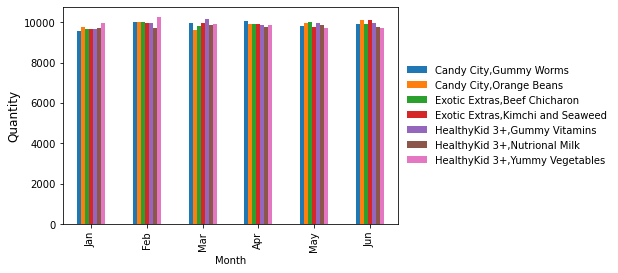

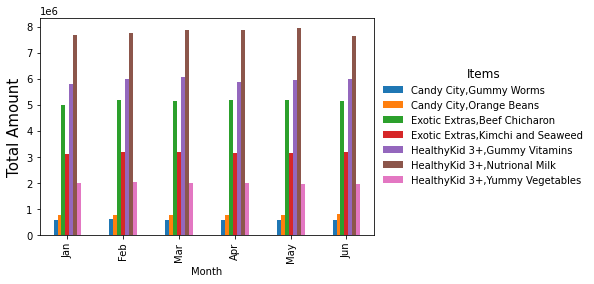

In [39]:
import matplotlib.pyplot as plt

ax = df2.pivot(index='Month', columns='Items', values='Qty').plot(kind='bar')
ax.set_ylabel("Quantity", fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),frameon=False, title_fontsize='large')


ax1 = df2.pivot(index='Month', columns='Items', values='Total Amount').plot(kind='bar')
ax1.set_ylabel("Total Amount", fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title="Items", frameon=False, title_fontsize='large')
plt.show()


In [7]:
## 3. Define repeaters, inactive, engaged
## Repeaters : 1 if customer of the current month had transaction from the previous month
## Inactive  : 1 if customer of the current month DID not have transaction but had previous transaction last month
## Engaged   : 1 if customer of the current month HAD transaction from the previous months 

trans_month = final_df.month.drop_duplicates().to_list()
trdf = final_df[['transaction_id', 'month', 'day', 'mail', 'username', 'name', 'transaction_value', 'is_single']].drop_duplicates()
trdf

,transaction_id,month,day,mail,username,name,transaction_value,is_single
0,0,Jan,Wednesday,watsonbrenda@gmail.com,veronicawells,Jennifer Campbell,5196,True
1,1,Jan,Wednesday,moorelisa@gmail.com,cgilbert,Melissa Kim,12056,False
4,2,Jan,Saturday,moorelisa@gmail.com,cgilbert,Melissa Kim,5500,False
6,3,Jan,Monday,moorelisa@gmail.com,cgilbert,Melissa Kim,500,True
7,4,Jan,Monday,michael78@yahoo.com,qhernandez,Kristen Cooper,2697,False
...,...,...,...,...,...,...,...,...
166106,83031,Jun,Sunday,christina55@hotmail.com,kmcconnell,Tammy Byrd,3588,False
166108,83032,Jun,Sunday,melvinschmidt@hotmail.com,llowe,Donald Andersen,2095,False
166111,83033,Jun,Wednesday,melvinschmidt@hotmail.com,llowe,Donald Andersen,3396,False
166114,83034,Jun,Thursday,melvinschmidt@hotmail.com,llowe,Donald Andersen,4280,False


In [8]:
## 3. Create table for transaction history
def to_user_transaction_history_df(trdf):
    user_history_dict = dict()
    trdf.month = pd.Categorical(trdf.month, categories=months)
    trans_month = trdf.month.drop_duplicates().to_list()
    for month in trans_month:
        a = trdf[(trdf.month == month)]
        b = a.groupby(['mail'])['transaction_id'].count()
        b = b.to_dict()
        user_history_dict.update({month: b})    
    return pd.DataFrame(user_history_dict)

user_history_df = to_user_transaction_history_df(trdf)
user_history_df

,Jan,Feb,Mar,Apr,May,Jun
aallen@hotmail.com,1.0,2.0,2.0,3.0,3.0,1.0
aaron21@yahoo.com,3.0,1.0,1.0,2.0,2.0,1.0
aaron37@hotmail.com,3.0,NaN,3.0,3.0,NaN,2.0
aaron45@hotmail.com,2.0,4.0,4.0,NaN,3.0,2.0
aaronbrady@hotmail.com,2.0,3.0,1.0,2.0,3.0,NaN
...,...,...,...,...,...,...
wrandall@yahoo.com,NaN,NaN,NaN,NaN,1.0,2.0
xkrause@yahoo.com,NaN,NaN,NaN,NaN,3.0,3.0
brianschmidt@gmail.com,NaN,NaN,NaN,NaN,NaN,3.0
hcharles@yahoo.com,NaN,NaN,NaN,NaN,NaN,3.0


In [9]:
## 3.1 Repeater
## Repeaters : 1 if customer of the current month had transaction from the previous month
rep_curr = user_history_df.copy()
rep_curr = (rep_curr.notnull())*1

rep_prev = rep_curr.copy()
rep_prev['Buffer'] = 0
rep_prev = rep_prev.drop(trans_month[-1], axis=1).reindex(columns=['Buffer']+trans_month[0:-1])

rep = np.multiply(rep_curr.to_numpy(),rep_prev.to_numpy())
rep = pd.DataFrame(rep, columns=trans_month, index=user_history_df.index)
rep = (rep>0)*1
repeaters = rep.sum(axis=0).to_dict()
repeaters

{'Jan': 0, 'Feb': 5275, 'Mar': 5331, 'Apr': 5296, 'May': 5237, 'Jun': 5320}

In [10]:
## 3.2 Inactive
## Inactive : 1 if customer of the current month DID not have transaction but had previous transaction last month
ina_curr = user_history_df.copy()

inactive = dict()
trdf.month = pd.Categorical(trdf.month, categories=months)
trans_month = trdf.month.drop_duplicates().to_list()
for m, month in enumerate(trans_month):
    if m==0:
        inactive.update({month: 0}) 
    else:
        temp = ina_curr.iloc[:,0:m+1]
        a = temp[temp[month].isnull()]
        b = a.sum(axis=1)
        b = b[b>0]
        inactive.update({month: len(b)})  
inactive



{'Jan': 0, 'Feb': 1525, 'Mar': 1865, 'Apr': 2031, 'May': 2054, 'Jun': 1964}

In [11]:
## 3.3 Engaged
## Engaged   : 1 if customer of the current month HAD transaction from the previous months 
eng_curr = user_history_df.copy()

engaged = dict()
trdf.month = pd.Categorical(trdf.month, categories=months)
trans_month = trdf.month.drop_duplicates().to_list()
for m, month in enumerate(trans_month):
    temp = eng_curr.iloc[:,0:m+1]
    a = temp[~temp[month].isnull()]
    b = a[~a.isnull().any(axis=1)]
    engaged.update({month: len(b)})  

engaged

{'Jan': 6800, 'Feb': 5275, 'Mar': 4169, 'Apr': 3304, 'May': 2655, 'Jun': 2159}

In [12]:
final_dfe = pd.DataFrame({"Repeaters": repeaters,
                        "Inactive": inactive,
                        "Engaged": engaged})
final_dfe = final_dfe.transpose()
final_dfe

,Jan,Feb,Mar,Apr,May,Jun
Repeaters,0,5275,5331,5296,5237,5320
Inactive,0,1525,1865,2031,2054,1964
Engaged,6800,5275,4169,3304,2655,2159
